# Instructions

In this notebook you have some problems to solve with Python coding. For each problem, explain your code with comments and explain how it works to solve the problem being addressed. You also MUST include the answers you get from running your code. These instructions may change as needed, so we suggest you read these anew on each homework (we will try to announce ahead if they change).

Collaboration is both allowed and encouraged! Using available resources from your peers is both wise and efficient. While you are welcome to work collaboratively with classmates, that means you can work together to solve problems together, not that one person does the work and others copy it. You are also welcome to use the internet as a resource to refresh your memory, clarify concepts, and help with short code snippets. In order to model good practice, you **MUST** cite your sources **at the time of assignment submission** (we will not accept citations sent after-the-fact), and you should not be copying large portions of code wholesale from any source: internet, human, artificial intelligence, or otherwise.

Things that are off limits:

 -    Soliciting (hey, what did you get for question X? Can you send me your code?) and/or copying code and/or answers from another person.

 -    Using sources appropriately but failing to cite them.

 -     Getting any AI, including ChatGPT, Gemini, or CoPilot to do your work for you.


As with every assignment in this course, begin with installing and importing the library designed for this course, ``determinism301`` using the following code in its own cell at the very beginning:
```py
!pip install -qU --extra-index-url https://determinism.data301.download determinism301
import determinism301
```

Before submitting, once you're sure your code is correct, it is recommended that you restart the session kernel under the Runtime/Kernel section and rerun your code with determinism301 to get your final answer to submit. If you have any errors that you suspect might be related to the determinism301 module, you can reference this list https://docs.google.com/document/d/1BdCadBrSKZ1rf29YWzeJ9Eh-UInUqAJZeAJVX79LxRM to see if the problem and solution are in there, and if you still can't solve it then make a private post to instructors on Piazza or Discord.

You **may not** set random_state, seed, or other similar parameters manually for any library unless explicitly instructed, as that will interfere with the reproducibility of your answers. For numpy, you **must** use the old-style ``np.random.uniform``, ``np.random.beta``, and so on distributions instead of ``np.random.default_rng().uniform``, ``np.random.default_rng().beta``, as the latter whave been made to produce stable results, but they will be different from ours which will cause difficulty grading. Using ``numpy.random.RandomState`` is also not allowed for the same reason. We will take off points for **each** problem these are used in, rather than once for the whole assignment.

We would like to make clear that you should read these instructions in full every time. There may be changes in the middle of the semester, and while we will do our best to notify you if anything changes, we are not responsible if there is something included in these instructions that wasn't read. Additionally, we will give clarifications to questions as needed on Piazza and/or Discord (depending on where the initial question came up), so we expect you to join at least one of those platforms, if not both. The links to join both are included in the syllabus.

Note: You **MUST** submit your answers as a Jupyter notebook (.ipynb), otherwise the determinism won't work.

Make sure you include (YOUR NAME, SUBQUESTION) (e.g. "Daniel Vasiliu, 2c") at the start of every code cell, it makes grading significantly easier and can help prevent any mistakes in grading your assignments.

**You may only use libraries that were imported for you at the top.**

# Import Statements

In [ ]:
!pip install -qU --extra-index-url https://determinism.data301.download determinism301
import determinism301

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 428.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [1]:
#InstallBlock
!pip install -qU --extra-index-url https://determinism.data301.download line-profiler
%load_ext line_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--
     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/1.5 MB 12.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.7 MB/s eta 0:00:00


In [ ]:
# ImportBlock

#import determinism301

import random
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
#import plotly #Alternatives to matplotlib
#import seaborn #Alternatives to matplotlib

from sklearn.svm import SVC #! Do no use any other methods from sklearn
from sklearn.preprocessing import StandardScaler #! Only allowed in 2c & 2d
from sklearn.model_selection import train_test_split #! Only allowed in 2c & 2d


**Note: All plots should have x and y axis labels, and a title at minimum, plus a legend if multiple distinct elements are present.**

# Problem 1: Gradient Descent (25 Points)

Code for the function to optimize, the bounds for optimization, and the start point is below:
```py
def f(x, y):
    part1 = 0.3*(x**2 + y**2)
    part2 = -np.cos(0.75*np.pi*x) - np.cos(0.5*np.pi*y)
    part3 = 0.4*np.sin(3*x + y) + 0.2*np.sin(x - 4*y)
    return part1 + part2 + part3
bounds = [(-5, 5), (-5, 5)]
start_point = (-4,4)
```

Code for visualization of f(x,y) is below, you WILL have to modify this to also visualize the data from the optimizer path, but make sure you **DO NOT** remove any code or modify existing code, just add. Also, make sure the linewidth parameter of these paths is set such that the paths are clearly visible and distinct
```py
def Visualize_F(f, bounds):
    #Create the figure
    fig = plt.figure(figsize=(15, 10))
    
    #Create grid of evaluation points in the bounds
    grid = np.meshgrid(np.linspace(bounds[0][0], bounds[0][1], 100), np.linspace(bounds[1][0], bounds[1][1], 100))
    
    #Evaluate the function on the grid and plot the contour
    plt.contour(grid[0], grid[1], f(grid[0], grid[1]), levels=20, cmap='inferno')
    
    #Setup the colorbar for showing f values
    plt.colorbar(label='f(x,y)')
    
    #Formatting
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour plot of f(x,y)')
    return fig
```

Note:
```py
fig = Visualize_F(f, bounds)
plt.plot([1],[2],'-r') #This will add to the figure
plt.title('New Title') #This will change the figure's title
```

**For this question, sklearn is not allowed**

## 1a: RMSPROP Optimizer (10 Points)

You will code a function that uses RMSPROP to find the minimum of a given function f(x,y). Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). Make your code as readable as possible and include comments explaining how the code works. Your function should **directly** take in params as such:
```py
def RMSPROP(f, bounds, start_point, num_steps=50, learning_rate=0.5, decay_rate=0.9, eps=1e-8):
```
**For full credit, display the optimizer path. Put a green marker at the start points and a red marker at the end points, drawing the path in between. These marks should be labeled in the legend and print the final end point and value f(final_x, final_y)**

In [279]:
#KEY

def Visualize_F(f, bounds):
    #Create the figure
    fig = plt.figure(figsize=(15, 10))
    
    #Create grid of evaluation points in the bounds
    grid = np.meshgrid(np.linspace(bounds[0][0], bounds[0][1], 100), np.linspace(bounds[1][0], bounds[1][1], 100))
    
    #Evaluate the function on the grid and plot the contour
    plt.contour(grid[0], grid[1], f(grid[0], grid[1]), levels=20, cmap='inferno')
    
    #Setup the colorbar for showing f values
    plt.colorbar(label='f(x,y)')
    
    #Formatting
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour plot of f(x,y)')
    return fig


def grad_f(f, x, y, h=1e-7):
    grad_x = (f(x + h, y) - f(x, y)) / h
    grad_y = (f(x, y + h) - f(x, y)) / h
    return np.array([grad_x, grad_y])


def f(x, y):
    part1 = 0.3*(x**2 + y**2)
    part2 = -np.cos(0.75*np.pi*x) - np.cos(0.5*np.pi*y)
    part3 = 0.4*np.sin(3*x + y) + 0.2*np.sin(x - 4*y)
    return part1 + part2 + part3
bounds = [(-5, 5), (-5, 5)]
start_point = (-4,4)

End Point: (-0.40, -0.15)
f(End Point): -1.85


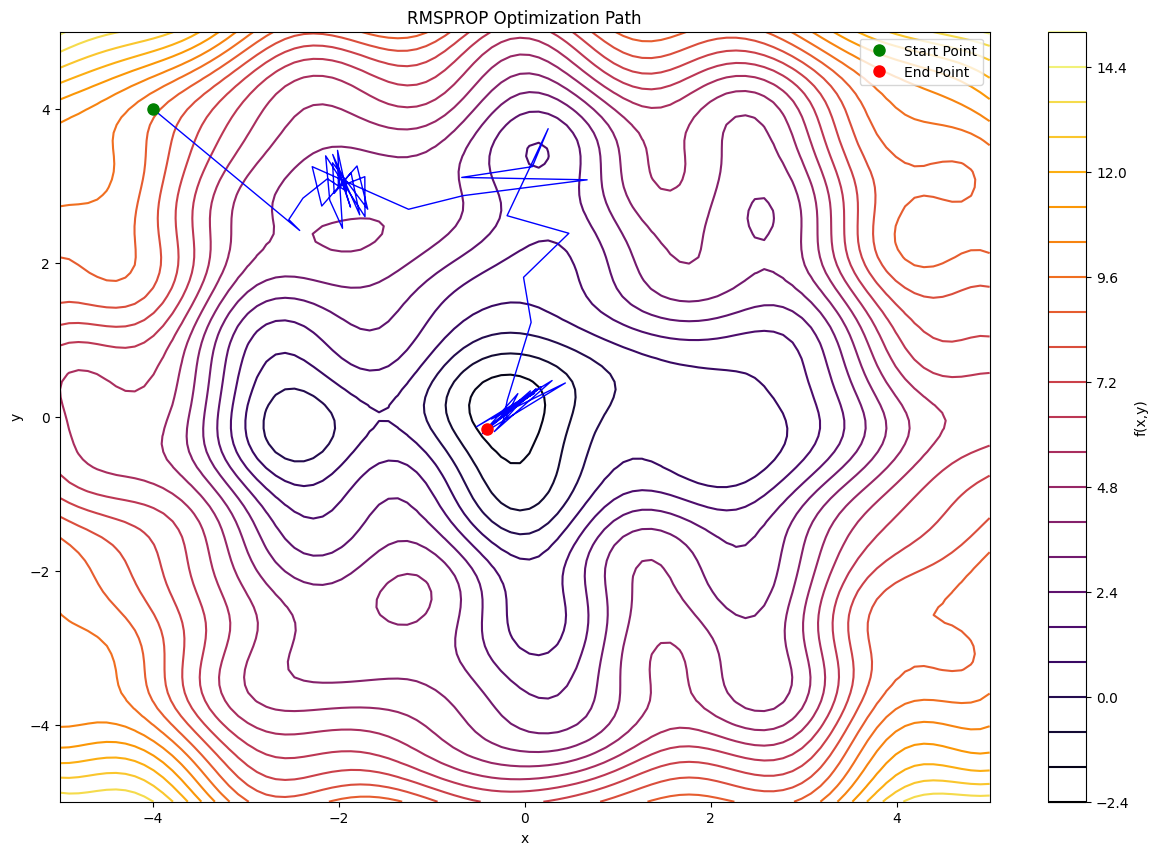

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 1b: Adam Optimizer (7 Points)

Now, code a function (in the same form) that uses ADAM optimization. use the same function, bounds, and start point. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). Make your code as readable as possible and include comments explaining how the code works. Your function should **directly** take in params as such:
```py
def ADAM(f, bounds, start_point, num_steps=50, learning_rate=0.5, beta_1=0.7, beta_2=0.999, eps=1e-8):
```
**For full credit, display the optimizer path. Put a green marker at the start points and a red marker at the end points, drawing the path in between. These marks should be labeled in the legend and print the final end point and value f(final_x, final_y)**

End Point: (-0.40, -0.15)
f(End Point): -1.85


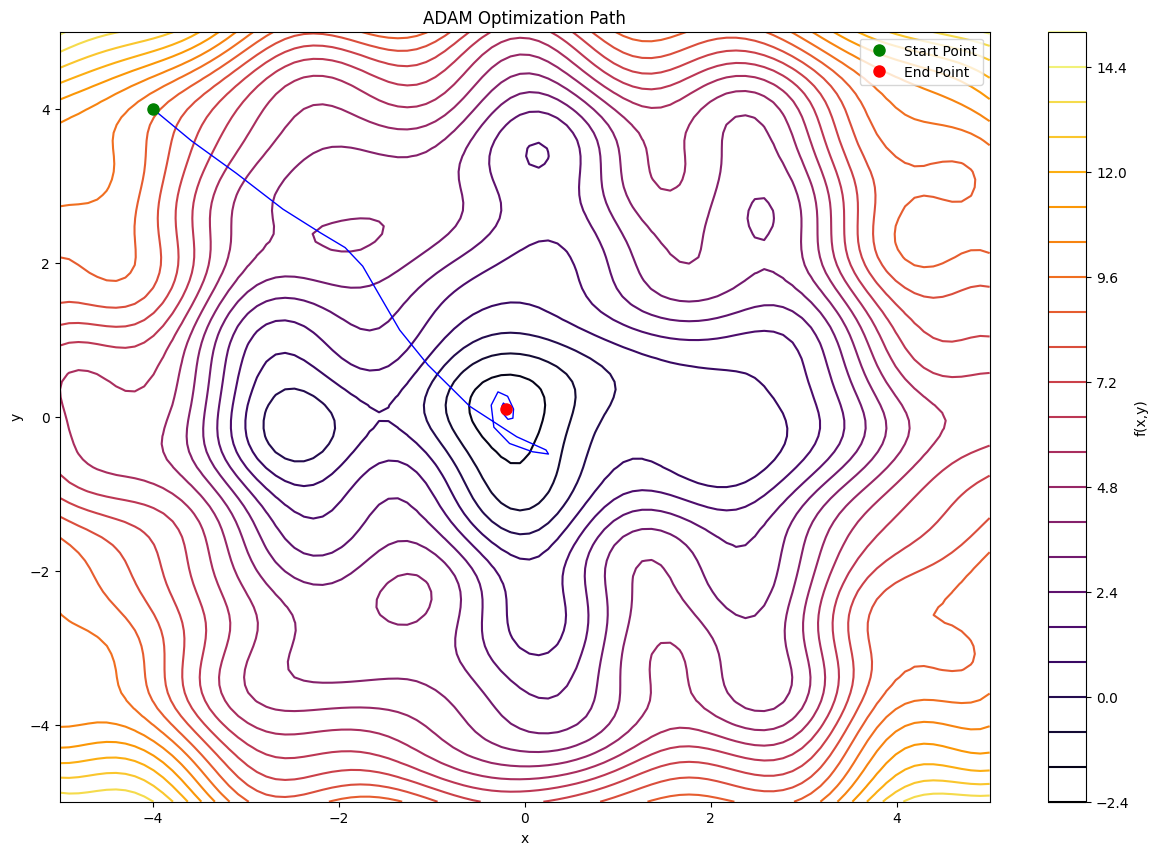

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 1c: Learning Rates (4 Points)

For this problem, run the code for the previous problem (ADAM), running two trajectories. One should have the default parameters, and one should have learning_rate=0.01 and num_steps=500. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). **Print out the end points and function evaluations as done previously. Use the same formatting as previously and plot the results of both paths on one plot. Label and color the end points seperately. Do the same for the paths** Make your code as readable as possible and include comments explaining how the code works. Here is an example for how your printed results should be formatted:
```py
'''
>>> Start Point: (-4.00, 4.00)
>>> lr=0.50 End Point: (-0.20, 0.10), f: -2.17
>>> lr=0.01 End Point: (-2.01, 3.07), f: 3.64
'''
```
**For full credit, include a statement comparing the behaviors of the two different trajectories. Also, hypothesize in words as to why they behave this way.**

Start Point: (-4.00, 4.00)
lr=0.50 End Point: (-0.20, 0.10), f: -2.17
lr=0.01 End Point: (-2.01, 3.07), f: 3.64


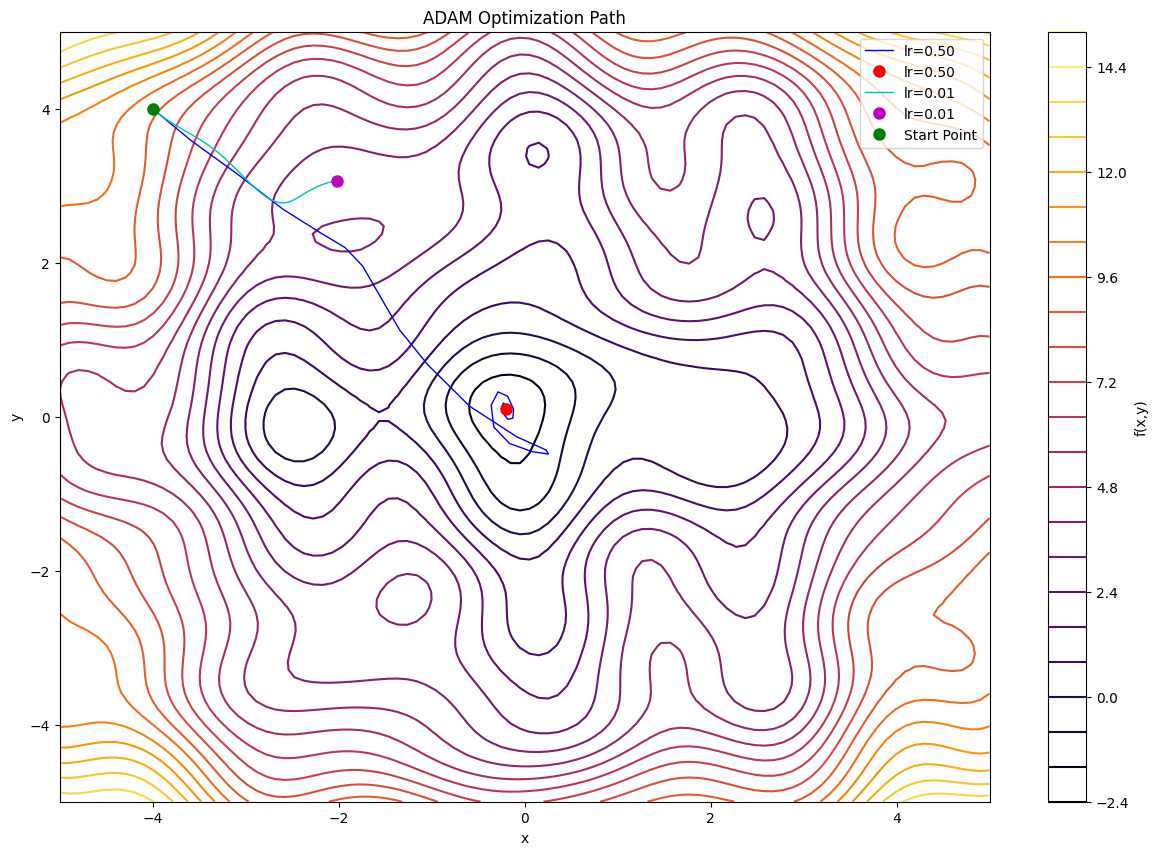

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 1d: Visualization (4 Points)

Create a plot which shows the optimized paths for both ADAM and RMSPROP for 4 randomized start points within the original bounds, color the paths differently based on the optimizer. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). **The start points should be plotted as small green points, and the end points should be plotted as small points which change color based on which optimizer used. You should include a legend. You should print out each of the end point coordinates and their corresponding f(x_end, y_end) values for each start point/optimizer** Make sure these points are still visible. Make your code as readable as possible and include comments explaining how the code works. All elements should be on one plot. What differences do you notice between the two optimizers' paths? Here is an example for how your printed results should be formatted:
```py
'''
>>> Start Point: (-0.26, -3.76)
>>> RMSPROP End Point: (0.10, 0.37), f: -1.71
>>> ADAM End Point: (-0.20, 0.10), f: -2.17

>>> Start Point: (3.50, -0.01)
>>> RMSPROP End Point: (2.39, -0.03), f: 0.34
>>> ADAM End Point: (2.13, -0.37), f: 0.07

>>> Start Point: (-0.05, -3.23)
>>> RMSPROP End Point: (-0.39, -0.15), f: -1.87
>>> ADAM End Point: (-0.20, 0.10), f: -2.17

>>> Start Point: (4.88, 4.85)
>>> RMSPROP End Point: (2.11, -0.56), f: 0.15
>>> ADAM End Point: (2.13, -0.37), f: 0.07
'''
```
**For full credit, also include comments on the difference in performance between the optimizers. Hypothesize in words as to why they behave this way?**

Start Point: (-1.82, -1.26)
RMSPROP End Point: (-2.15, 0.14), f: -0.03
ADAM End Point: (-2.46, -0.13), f: -0.61

Start Point: (4.15, 4.37)
RMSPROP End Point: (2.30, -0.13), f: 0.22
ADAM End Point: (2.13, -0.37), f: 0.07

Start Point: (3.14, 0.19)
RMSPROP End Point: (2.36, -0.24), f: 0.18
ADAM End Point: (2.13, -0.36), f: 0.07

Start Point: (1.75, -4.76)
RMSPROP End Point: (-0.29, 0.20), f: -2.12
ADAM End Point: (-0.20, 0.10), f: -2.17



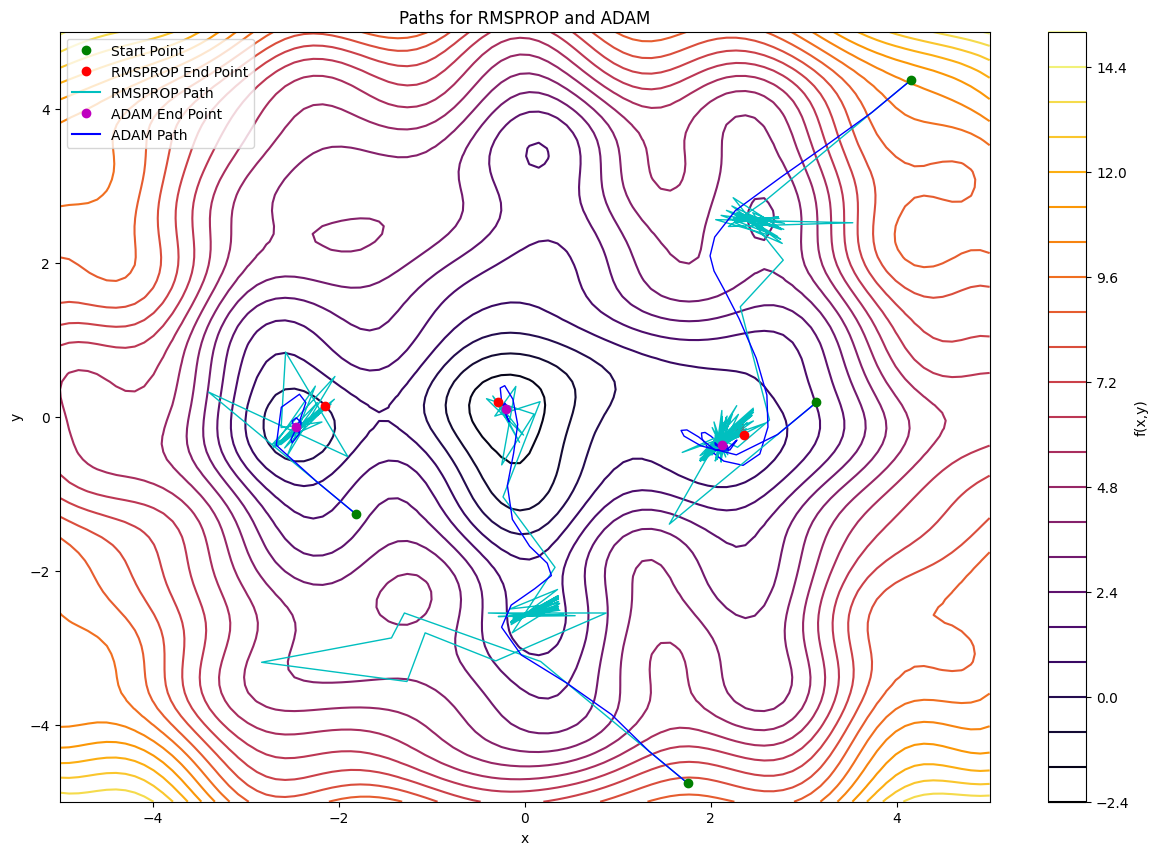

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

# Problem 2: Elastic Net (40 Points)

In this problem, you will be creating an ElasticNet class, which uses ADAM as an optimizer. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). The subquestions below are just indicating how the points for the problem are distributed and the expectations, suggestions for a specific portion. Make your code as readable as possible and include comments explaining how the code works. **You will need to place all the code for the class in one cell below.** Pay attention to the default parameters, and do not change any. **You will need to run all of the included tests for all of the subparts. You can run these tests individually, but should include a cell which runs them all back to back with logging set to True.** Below is a basic structure for the class:
```py
class ElasticNet:
	def __init__(self, alpha=0.1, l1_ratio=0.5, epochs=1000, batch_size=10, tol=1e-6, eta=0.001, beta_1=0.4, beta_2=0.5, scaling=True, fit_intercept=True):
		#Store any parameters as attributes
		#Initialize any class state variables
		#Initialize any tracker/data-storage variables

	def _preprocessing(self, X, fit=True):
		#Do scaling if necessary, fitting when necessary
		#Add intercepts if necessary
		#Return X_train_processed, X_test_processed
		#Initialize weights and optimizer state variables when necessary, weights should be initialized with np.random.randn()
		#Return processed X

	def forward(self, X):
		#Forward propagate (i.e. multiply inputs by weights and add biases)
		#Return y_pred

	def __grad(self, X, y):
		#Compute the gradient of the ElasticNet loss with respect to the weights (the formula is in the lecture notes)
		#return grad

	def __ADAM(self, X, y):
		#Use computed gradient to calculate the new weights (or the change in weights)
		#Return w_new or dw


	def backward(self, X, y):
		#Update weights, check if dw is smaller than given tolerance and stop training if so

	def fit(self, X, y):
		#Process training data
		#Run through episodes, predicting outputs, calculating grads, and updating weights
		#Stop early if converged to within tolerance
		#Train in batches within each epoch

	def score(self, X, y):
		#Scale & process the testing data as necessary
		#Predict the targets
		#Compute the R^2 score
		#return R2

```

**NOTE: The instructions will be very long for this problem, this is largely due to the inclusion of tests in the instructions. Feel free to minimize the test function definitions in your code to clear up some space.**

**For this question, sklearn is not allowed.**

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

**ALL CODE FOR CLASS DEFINITION/METHODS SHOULD BE PLACED IN CELL ABOVE**

## 2a: self.\_\_init\_\_(), self.\_preprocessing(), & self.forward() (7.5 Points)

Implement the \_\_init\_\_(), \_preprocessing(), and forward() methods. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). Scaling will be done as standard scaling (mean=0 std=1). Weights will be initialized with np.random.randn(). **In terms of class state variables, you need to be able to retrieve both whether the model scaling has been fit and whether the model itself has been fit (trained)** Make your code as readable as possible and include comments explaining how the code works. I have included test cases below for some of these methods:

**Preprocess Test:**
```py
def preprocessing_test(log=True):
    #Parameters DO NOT CHANGE
    samples = 10000
    features = 1000
    tol = 1e-8

    #Generate synthetic data
    X_synthetic_2a = 10*np.random.randn(samples, features)

    #Create default class instance and preprocess data
    ElasticNet_2a = ElasticNet()
    X_processed_2a = ElasticNet_2a._preprocessing(X_synthetic_2a, fit=True)

    #Extract the intercept column (first column) and checks they are all 1s
    X_int_2a = X_processed_2a[:,0]
    int_test = (X_int_2a == np.ones(samples)).all()

    #Extract the other columns and check they are scaled to mean=0, std=1
    X_other_2a = X_processed_2a[:,1:]
    mean_test = (np.abs(X_other_2a.mean(axis=0)) < tol).all() #Checks that all feature means are with tolerance of 0
    std_test = (np.abs(X_other_2a.std(axis=0) - 1) < tol).all() #Checks that all feature stds are within tolerance of 1
    
    #Check that the fitted attribute is now True
    fitted_test = ElasticNet_2a.fitted == True
    
    #Check the weights are initialized correctly
    weights_shape_test = ElasticNet_2a.w.shape[0] == features + 1
    weights_mean_test = np.abs(ElasticNet_2a.w.mean()) < 0.1
    weights_std_test = np.abs(ElasticNet_2a.w.std() - 1) < 0.1
    
    #Check all tests passed
    preprocess_all_passed = int_test and mean_test and std_test and fitted_test and weights_shape_test
    
    #Print statements
    if log:
        print('Intercept Test:' + ' '*13 + f'{int_test}')
        print('Mean Test:' + ' '*18 + f'{mean_test}')
        print('Std Test:' + ' '*19 + f'{std_test}')
        print('Fitted Attribute Test:' + ' '*6 + f'{fitted_test}')
        print('Weights Shape Test:' + ' '*9 + f'{weights_shape_test}')
        print('Weights Mean Test:' + ' '*10 + f'{weights_mean_test}')
        print('Weights Std Test:' + ' '*11 + f'{weights_std_test}\n')
        if preprocess_all_passed:
            print("All preprocessing tests passed!\n\n")
        else:
            print("Some preprocessing tests failed.\n\n")
            print(f'Mean of scaled features (should be ~0): {X_other_2a.mean(axis=0)}')
            print(f'Std of scaled features (should be ~1): {X_other_2a.std(axis=0)}')
            print(f'Weights Shape: {ElasticNet_2a.w.shape}')
            print(f'Weights Mean (should be ~0): {ElasticNet_2a.w.mean()}')
            print(f'Weights Std (should be ~1): {ElasticNet_2a.w.std()}')
        
    return preprocess_all_passed, X_synthetic_2a, ElasticNet_2a
```

**Forward Test:**
```py
def forward_test(preprocess_all_passed, X_synthetic_2a, ElasticNet_2a, log=True):
    #Check that all forward tests passed, raise error if not
    if not preprocess_all_passed:
        raise ValueError("Preprocessing tests did not pass. Cannot run forward test.")
    
    #Parameters DO NOT CHANGE
    tol = 1e-8
    
    #Compute forward pass
    X_processed_2a = ElasticNet_2a._preprocessing(X_synthetic_2a, fit=False)
    y_pred_2a = ElasticNet_2a.forward(X_processed_2a)
    forward_shape_test = y_pred_2a.shape == (X_synthetic_2a.shape[0],)
    forward_mean_test = np.abs((y_pred_2a - ElasticNet_2a.w[0]).mean()) < tol
    forward_std_test = 28 <y_pred_2a.std() < 34
    
    #Check all tests passed
    forward_all_passed = forward_shape_test and forward_mean_test and forward_std_test
    
    #Print statements
    if log:
        print('Forward Shape Test:' + ' '*5 + f'{forward_shape_test}')
        print('Forward Mean Test:' + ' '*6 + f'{forward_mean_test}')
        print('Forward Std Test:' + ' '*7 + f'{forward_std_test}\n')
        if forward_all_passed:
            print("All forward tests passed!\n\n")
        else:
            print("Some forward tests failed.\n\n")
            print(f'Forward Output Shape (should be (10000,)): {y_pred_2a.shape}')
            print(f'Forward Output Mean (should be ~{ElasticNet_2a.w[0]}): {y_pred_2a.mean()}')
            print(f'Forward Output Std (should be between 28 and 34): {y_pred_2a.std()}')
            
    return forward_all_passed, X_processed_2a, y_pred_2a, ElasticNet_2a
```

In [284]:
#KEY

def preprocessing_test(log=True):
    #Parameters DO NOT CHANGE
    samples = 10000
    features = 1000
    tol = 1e-8

    #Generate synthetic data
    X_synthetic_2a = 10*np.random.randn(samples, features)

    #Create default class instance and preprocess data
    ElasticNet_2a = ElasticNet()
    X_processed_2a = ElasticNet_2a._preprocessing(X_synthetic_2a, fit=True)

    #Extract the intercept column (first column) and checks they are all 1s
    X_int_2a = X_processed_2a[:,0]
    int_test = (X_int_2a == np.ones(samples)).all()

    #Extract the other columns and check they are scaled to mean=0, std=1
    X_other_2a = X_processed_2a[:,1:]
    mean_test = (np.abs(X_other_2a.mean(axis=0)) < tol).all() #Checks that all feature means are with tolerance of 0
    std_test = (np.abs(X_other_2a.std(axis=0) - 1) < tol).all() #Checks that all feature stds are within tolerance of 1
    
    #Check that the fitted attribute is now True
    fitted_test = ElasticNet_2a.fitted == True
    
    #Check the weights are initialized correctly
    weights_shape_test = ElasticNet_2a.w.shape[0] == features + 1
    weights_mean_test = np.abs(ElasticNet_2a.w.mean()) < 0.1
    weights_std_test = np.abs(ElasticNet_2a.w.std() - 1) < 0.1
    
    #Check all tests passed
    preprocess_all_passed = int_test and mean_test and std_test and fitted_test and weights_shape_test
    
    #Print statements
    if log:
        print('Intercept Test:' + ' '*13 + f'{int_test}')
        print('Mean Test:' + ' '*18 + f'{mean_test}')
        print('Std Test:' + ' '*19 + f'{std_test}')
        print('Fitted Attribute Test:' + ' '*6 + f'{fitted_test}')
        print('Weights Shape Test:' + ' '*9 + f'{weights_shape_test}')
        print('Weights Mean Test:' + ' '*10 + f'{weights_mean_test}')
        print('Weights Std Test:' + ' '*11 + f'{weights_std_test}\n')
        if preprocess_all_passed:
            print("All preprocessing tests passed!\n\n")
        else:
            print("Some preprocessing tests failed.\n\n")
            print(f'Mean of scaled features (should be ~0): {X_other_2a.mean(axis=0)}')
            print(f'Std of scaled features (should be ~1): {X_other_2a.std(axis=0)}')
            print(f'Weights Shape: {ElasticNet_2a.w.shape}')
            print(f'Weights Mean (should be ~0): {ElasticNet_2a.w.mean()}')
            print(f'Weights Std (should be ~1): {ElasticNet_2a.w.std()}')
        
    return preprocess_all_passed, X_synthetic_2a, ElasticNet_2a



#Run Test
preprocess_all_passed, X_synthetic_2a, ElasticNet_2a = preprocessing_test(log=True)

Intercept Test:             True
Mean Test:                  True
Std Test:                   True
Fitted Attribute Test:      True
Weights Shape Test:         True
Weights Mean Test:          True
Weights Std Test:           True

All preprocessing tests passed!




In [285]:
#KEY

def forward_test(preprocess_all_passed, X_synthetic_2a, ElasticNet_2a, log=True):
    #Check that all forward tests passed, raise error if not
    if not preprocess_all_passed:
        raise ValueError("Preprocessing tests did not pass. Cannot run forward test.")
    
    #Parameters DO NOT CHANGE
    tol = 1e-8
    
    #Compute forward pass
    X_processed_2a = ElasticNet_2a._preprocessing(X_synthetic_2a, fit=False)
    y_pred_2a = ElasticNet_2a.forward(X_processed_2a)
    forward_shape_test = y_pred_2a.shape == (X_synthetic_2a.shape[0],)
    forward_mean_test = np.abs((y_pred_2a - ElasticNet_2a.w[0]).mean()) < tol
    forward_std_test = 28 <y_pred_2a.std() < 34
    
    #Check all tests passed
    forward_all_passed = forward_shape_test and forward_mean_test and forward_std_test
    
    #Print statements
    if log:
        print('Forward Shape Test:' + ' '*5 + f'{forward_shape_test}')
        print('Forward Mean Test:' + ' '*6 + f'{forward_mean_test}')
        print('Forward Std Test:' + ' '*7 + f'{forward_std_test}\n')
        if forward_all_passed:
            print("All forward tests passed!\n\n")
        else:
            print("Some forward tests failed.\n\n")
            print(f'Forward Output Shape (should be (10000,)): {y_pred_2a.shape}')
            print(f'Forward Output Mean (should be ~{ElasticNet_2a.w[0]}): {y_pred_2a.mean()}')
            print(f'Forward Output Std (should be between 28 and 34): {y_pred_2a.std()}')
            
    return forward_all_passed, X_processed_2a, y_pred_2a, ElasticNet_2a
    
    
    
#Run Test
forward_all_passed, X_processed_2a, y_pred_2a, ElasticNet_2a = forward_test(preprocess_all_passed, X_synthetic_2a, ElasticNet_2a, log=True)

Forward Shape Test:     True
Forward Mean Test:      True
Forward Std Test:       True

All forward tests passed!




## 2b: self.\_grad(), self.\_ADAM(), & self.backward() (12.5 Points)

Implements the _grad(), _ADAM(), and backward() methods. The formula for the gradient used in ElasticNet can be found in the lecture notes and can be broken down into an MSE component and a regularization component. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). **For the regularization component, the weight corresponding to the intercept feature column, if its exists, should not be calculated in. This specific weight does not qualify for regularization.** Make your code as readable as possible and include comments explaining how the code works. I have included test cases below for some of these methods:

**Grad Test:**
```py
def grad_test(forward_all_passed, X_processed_2a, y_pred_2a, ElasticNet_2a, log=True):
    #Check that all forward tests passed, raise error if not
    if not forward_all_passed:
        raise ValueError("Forward tests did not pass. Cannot run grad test.")

    #Create a new instance for new subproblem
    X_processed_2b = copy.deepcopy(X_processed_2a)
    y_pred_2b = copy.deepcopy(y_pred_2a)
    ElasticNet_2b = copy.deepcopy(ElasticNet_2a)
    
    #Parameters DO NOT CHANGE
    tol1 = 0.1
    tol2 = 1e-4
    
    #Compute gradient
    grad_2b = ElasticNet_2b._ElasticNet__grad(X_processed_2b, y_pred_2b)
    grad_shape_test = grad_2b.shape == ElasticNet_2b.w.shape
    grad_mean_test = np.abs(grad_2b.mean()) < tol1
    grad_reg_test = np.all(np.abs(grad_2b[1:]*np.sign(ElasticNet_2b.w[1:])) > 0) and (np.abs(grad_2b[0]) < tol2)
    
    #Check all tests passed
    grad_all_passed = grad_shape_test and grad_mean_test
    #Print statements
    if log:
        print('Grad Shape Test:' + ' '*5 + f'{grad_shape_test}')
        print('Grad Mean Test:' + ' '*6 + f'{grad_mean_test}')
        print('Grad Reg Test:' + ' '*7 + f'{grad_reg_test}\n')
        if grad_all_passed:
            print("All grad tests passed!\n\n")
        else:
            print("Some grad tests failed.\n\n")
            print(f'Grad Shape (should be (1001,)): {grad_2b.shape}')
            print(f'Grad Mean (should be ~0): {grad_2b.mean()}')
            print(f'Intercept Grad (should be ~0): {grad_2b[0]}')
            print(f'Other Grads Sign Sum (should be 1000): {np.sign(grad_2b[1:]*np.sign(ElasticNet_2b.w[1:])).sum()}')
            
    return grad_all_passed, X_processed_2b, y_pred_2b, ElasticNet_2b, grad_2b
```
**Note: There are no explicit test functions for ADAM or Backward, they are implicitly tested in 2c**

In [286]:
#KEY

def grad_test(forward_all_passed, X_processed_2a, y_pred_2a, ElasticNet_2a, log=True):
    #Check that all forward tests passed, raise error if not
    if not forward_all_passed:
        raise ValueError("Forward tests did not pass. Cannot run grad test.")

    #Create a new instance for new subproblem
    X_processed_2b = copy.deepcopy(X_processed_2a)
    y_pred_2b = copy.deepcopy(y_pred_2a)
    ElasticNet_2b = copy.deepcopy(ElasticNet_2a)
    
    #Parameters DO NOT CHANGE
    tol1 = 0.1
    tol2 = 1e-4
    
    #Compute gradient
    grad_2b = ElasticNet_2b._ElasticNet__grad(X_processed_2b, y_pred_2b)
    grad_shape_test = grad_2b.shape == ElasticNet_2b.w.shape
    grad_mean_test = np.abs(grad_2b.mean()) < tol1
    grad_reg_test = np.all(np.abs(grad_2b[1:]*np.sign(ElasticNet_2b.w[1:])) > 0) and (np.abs(grad_2b[0]) < tol2)
    
    #Check all tests passed
    grad_all_passed = grad_shape_test and grad_mean_test
    #Print statements
    if log:
        print('Grad Shape Test:' + ' '*5 + f'{grad_shape_test}')
        print('Grad Mean Test:' + ' '*6 + f'{grad_mean_test}')
        print('Grad Reg Test:' + ' '*7 + f'{grad_reg_test}\n')
        if grad_all_passed:
            print("All grad tests passed!\n\n")
        else:
            print("Some grad tests failed.\n\n")
            print(f'Grad Shape (should be (1001,)): {grad_2b.shape}')
            print(f'Grad Mean (should be ~0): {grad_2b.mean()}')
            print(f'Intercept Grad (should be ~0): {grad_2b[0]}')
            print(f'Other Grads Sign Sum (should be 1000): {np.sign(grad_2b[1:]*np.sign(ElasticNet_2b.w[1:])).sum()}')
            
    return grad_all_passed, X_processed_2b, y_pred_2b, ElasticNet_2b, grad_2b



#Run Test
grad_all_passed, X_processed_2b, y_pred_2b, ElasticNet_2b, grad_2b = grad_test(forward_all_passed, X_processed_2a, y_pred_2a, ElasticNet_2a, log=True)

Grad Shape Test:     True
Grad Mean Test:      True
Grad Reg Test:       True

All grad tests passed!




## 2c: self.fit() & self.score() (10 Points)

Implement the fit() and score() methods. The fit method should be properly batched, with the training data being shuffled. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). The score method should produce a $R^2$ value based on the provided X and y data. Make your code as readable as possible and include comments explaining how the code works. I have included test cases below for some of these methods:

**Fit & Score Test:**
```py
def fit_score_test(log=True):
    #Create a new instance
    ElasticNet_3 = ElasticNet()
    
    #Parameters DO NOT CHANGE
    samples = 1000
    features = 2500
    tol = 0.02
    
    #Generate synthetic dataset 1 (deterministic)
    Xs_train_1 = 10*np.random.randn(samples, features)
    Xs_test_1 = 10*np.random.randn(samples//5, features)
    ys_train_1 = Xs_train_1[:,0]
    ys_test_1 = Xs_test_1[:,0]
    
    #Generate synthetic dataset 2 (independent)
    ys_train_2 = np.random.randn(samples)
    ys_test_2 = np.random.randn(samples//5)
    
    #Fit & Score the model on dataset 1 (train & test)
    ElasticNet_3.fit(Xs_train_1, ys_train_1)
    r2_train_1 = ElasticNet_3.score(Xs_train_1, ys_train_1)
    r2_test_1 = ElasticNet_3.score(Xs_test_1, ys_test_1)
    r2_train_1_test = r2_train_1 > 1 - tol
    r2_test_1_test = r2_test_1 > 1 - tol
    
    #Fit & Score the model on dataset 2 (train & test)
    ElasticNet_3.fit(Xs_train_1, ys_train_2)
    r2_train_2 = ElasticNet_3.score(Xs_train_1, ys_train_2)
    r2_test_2 = ElasticNet_3.score(Xs_test_1, ys_test_2)
    r2_train_2_test = r2_train_2 > 0.5
    r2_test_2_test = r2_test_2 < tol
    
    #Check all tests passed
    fit_score_all_passed = r2_train_1_test and r2_test_1_test and r2_train_2_test and r2_test_2_test
    
    #Print statements
    if log:
        print('R^2 Train Dataset 1 Test:' + ' '*5 + f'{r2_train_1_test} (R^2: {r2_train_1:.4f})')
        print('R^2 Test Dataset 1 Test:' + ' '*6 + f'{r2_test_1_test} (R^2: {r2_test_1:.4f})')
        print('R^2 Train Dataset 2 Test:' + ' '*5 + f'{r2_train_2_test} (R^2: {r2_train_2:.4f})')
        print('R^2 Test Dataset 2 Test:' + ' '*6 + f'{r2_test_2_test} (R^2: {r2_test_2:.4f})\n')
        if fit_score_all_passed:
            print("All fit and score tests passed!\n\n")
        else:
            print("Some fit and score tests failed.\n\n")
            print(f'R^2 Train Dataset 1 (should be > {1 - tol}): {r2_train_1}')
            print(f'R^2 Test Dataset 1 (should be > {1 - tol}): {r2_test_1}')
            print(f'R^2 Train Dataset 2 (should be > 0.5): {r2_train_2}')
            print(f'R^2 Test Dataset 2 (should be < {tol}): {r2_test_2}')
    
    return fit_score_all_passed
```

In [287]:
#KEY

def fit_score_test(log=True):
    #Create a new instance
    ElasticNet_3 = ElasticNet()
    
    #Parameters DO NOT CHANGE
    samples = 1000
    features = 2500
    tol = 0.02
    
    #Generate synthetic dataset 1 (deterministic)
    Xs_train_1 = 10*np.random.randn(samples, features)
    Xs_test_1 = 10*np.random.randn(samples//5, features)
    ys_train_1 = Xs_train_1[:,0]
    ys_test_1 = Xs_test_1[:,0]
    
    #Generate synthetic dataset 2 (independent)
    ys_train_2 = np.random.randn(samples)
    ys_test_2 = np.random.randn(samples//5)
    
    #Fit & Score the model on dataset 1 (train & test)
    ElasticNet_3.fit(Xs_train_1, ys_train_1)
    r2_train_1 = ElasticNet_3.score(Xs_train_1, ys_train_1)
    r2_test_1 = ElasticNet_3.score(Xs_test_1, ys_test_1)
    r2_train_1_test = r2_train_1 > 1 - tol
    r2_test_1_test = r2_test_1 > 1 - tol
    
    #Fit & Score the model on dataset 2 (train & test)
    ElasticNet_3.fit(Xs_train_1, ys_train_2)
    r2_train_2 = ElasticNet_3.score(Xs_train_1, ys_train_2)
    r2_test_2 = ElasticNet_3.score(Xs_test_1, ys_test_2)
    r2_train_2_test = r2_train_2 > 0.5
    r2_test_2_test = r2_test_2 < tol
    
    #Check all tests passed
    fit_score_all_passed = r2_train_1_test and r2_test_1_test and r2_train_2_test and r2_test_2_test
    
    #Print statements
    if log:
        print('R^2 Train Dataset 1 Test:' + ' '*5 + f'{r2_train_1_test} (R^2: {r2_train_1:.4f})')
        print('R^2 Test Dataset 1 Test:' + ' '*6 + f'{r2_test_1_test} (R^2: {r2_test_1:.4f})')
        print('R^2 Train Dataset 2 Test:' + ' '*5 + f'{r2_train_2_test} (R^2: {r2_train_2:.4f})')
        print('R^2 Test Dataset 2 Test:' + ' '*6 + f'{r2_test_2_test} (R^2: {r2_test_2:.4f})\n')
        if fit_score_all_passed:
            print("All fit and score tests passed!\n\n")
        else:
            print("Some fit and score tests failed.\n\n")
            print(f'R^2 Train Dataset 1 (should be > {1 - tol}): {r2_train_1}')
            print(f'R^2 Test Dataset 1 (should be > {1 - tol}): {r2_test_1}')
            print(f'R^2 Train Dataset 2 (should be > 0.5): {r2_train_2}')
            print(f'R^2 Test Dataset 2 (should be < {tol}): {r2_test_2}')
    
    return fit_score_all_passed
    


#Run Test
fit_score_all_passed = fit_score_test(log=True)

R^2 Train Dataset 1 Test:     True (R^2: 0.9993)
R^2 Test Dataset 1 Test:      True (R^2: 0.9991)
R^2 Train Dataset 2 Test:     True (R^2: 0.7452)
R^2 Test Dataset 2 Test:      True (R^2: -0.3279)

All fit and score tests passed!




## 2d: Train-Test Split & Concrete Data (5 Points)

Your ElasticNet class should now be complete! Next, you should test it on some real data. Using the concrete dataset below, train the model to predict the 'strength' column as the target. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). The code for loading in the data is as follows:
```py
data = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/concrete.csv?raw=true')
```
Firstly, you should extract the features and targets from the data and **split the data into a training and testing set (With a split of 80% train and 20% test)** Make your code as readable as possible and include comments explaining how the code works. Your code to split the data into train and test datasets should be a function which takes the form:
```py
def my_train_test_split(X, y, test_frac=0.2):
	#.... Code
	return X_train, y_train, X_test, y_test
```

Secondly, create a function to initialize an instance of the ElasticNet class, fit it on the training data, and **score it on both the training and testing data.** Other than when specified, you can assume the ElasticNet instances will take in the default arguments defined above. The function should take the following form:
```py
def TrainENET(X_train, y_train, X_test, y_test, epochs):
	#Create instance
	#Fit on train
	#Score on train
	#Score on test
	return r2_test, r2_train
```

Next, retrieve the train and test scores for the model for each of the following values of epochs:
```py
epoch_list = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000]
```

Finally, plot the training and testing scores versus the number of epochs. Make the testing line blue and the training line red. Include a legend and make the xscale logarithmic.

**NOTE: For this problem you are NOT ALLOWED to use any sklearn**

In [288]:
#KEY

def train_test_split(X, y, test_size=0.2):
    train_idx = np.random.choice(range(X.shape[0]), size=int((1 - test_size)*X.shape[0]), replace=False)
    test_idx = np.array([i for i in range(X.shape[0]) if i not in train_idx])
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, X_test, y_train, y_test

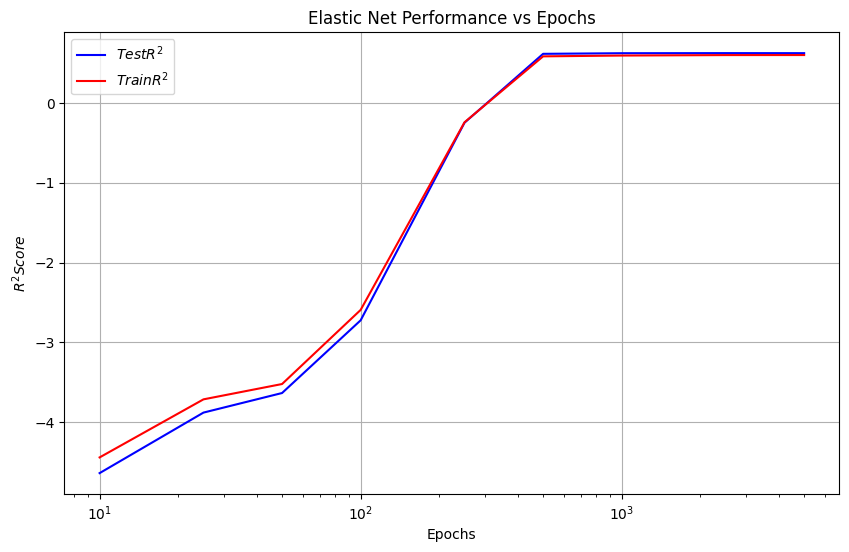

In [289]:
#KEY

#Load in data
data = pd.read_csv('https://github.com/dvasiliu/AML/blob/main/Data%20Sets/concrete.csv?raw=true')
X = data.drop(columns=['strength']).values
y = data['strength'].values

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def TrainENET(X_train, y_train, X_test, y_test, epochs):
	#Create and train the model
	enet = ElasticNet(epochs=epochs)
	enet.fit(X_train, y_train)

	#Evaluate the model
	r2_test = enet.score(X_test, y_test)
	r2_train = enet.score(X_train, y_train)

	return r2_test, r2_train

epoch_list = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000]
r2s_test = []
r2s_train = []
for epochs in epoch_list:
	r2_test, r2_train = TrainENET(X_train, y_train, X_test, y_test, epochs)
	r2s_test.append(r2_test)
	r2s_train.append(r2_train)

fig = plt.figure(figsize=(10,6))
plt.plot(epoch_list, r2s_test, '-b', label=r'$Test R^2$')
plt.plot(epoch_list, r2s_train, '-r', label=r'$Train R^2$')
plt.xlabel('Epochs')
plt.xscale('log')
plt.ylabel(r'$R^2 Score$')
plt.title('Elastic Net Performance vs Epochs')
plt.grid()
plt.legend()

## 2e: Profiling (5 Points)

Using ``%%lprun_all`` from line-profiler, **find which lines of code contribute significantly to your runtime (>= 5%) for 2a, 2b, 2c, and 2d (combine the code into one cell, including the class definition but excluding the tests)**, note these lines of code down below in comments alongside what percentage of the *TOTAL* training runtime they take up (you will need to do some math). For reference, the % Time column shows the percentage of time taken out of the total runtime for that specific function, but not the total runtime for the whole cell, so you'll need to multiply the % Time for any given line by the total time that the function took then divide by the total time that the cell took. **These times may not add up to 100% due to profiling overhead, if that happens then just pretend it didn't and calculate as normal.** This is a bug that Neeltje is currently working on fixing. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). If these lines are function or method calls, you should profile that function or method to determine what is actually taking up the time. Make your code as readable as possible and include comments explaining how the code works.

It is possible that no individual line takes up more than 5% of your total runtime, if this is the case, simply note which 3 lines take up the most runtime. For the top 3 slowest lines of code, **excluding lines that call a funtion that you defined**, write a quick explanation of why you think they take so long (you will not lose points if these explanations are wrong, just try to take a guess for the reason and we'll try to provide feedback). You don't need to look at any absolute runtime numbers besides when calculating % Time for the cell, we are only dealing with the percentage breakdown for this problem.

**NOTE: This is slightly different from the last homework as you need to exclude lines that call a function that you defined.**

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

# Problem 3: SVC (15 Points)

## 3a: KFold (6.5 Points)

Create a function which trains a sklearn model using a KFold. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). **Run the function on a default instance of your ElasticNet class and the concrete dataset from the previous problem.** Make your code as readable as possible and include comments explaining how the code works. **For this subquestion (3a), no use of scikit-learn is allowed.** The function for this problem should take the form:
```py
def KFold(model, X, y, k=5):
	#...
	return test_scores, train_scores
```

You should print out the test and train scores for each fold individually. Here is an example for how your printed results should be formatted:
```py
'''
>>> Fold 1: Test Score: 0.5733, Train Score: 0.6065
>>> Fold 2: Test Score: 0.5847, Train Score: 0.6045
>>> Fold 3: Test Score: 0.5889, Train Score: 0.6017
>>> Fold 4: Test Score: 0.6608, Train Score: 0.5907
>>> Fold 5: Test Score: 0.5460, Train Score: 0.6083
'''
```

**Note: You can assume the model is trained by ```model.fit(X_train, y_train)``` and scored by ```model.score(X_i, y_i)```. You can use copy.deepcopy(model) to create a copy of the model for each fold.**

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

Fold 1: Test Score: 0.5367, Train Score: 0.6163
Fold 2: Test Score: 0.5570, Train Score: 0.6093
Fold 3: Test Score: 0.5898, Train Score: 0.6034
Fold 4: Test Score: 0.6604, Train Score: 0.5834
Fold 5: Test Score: 0.6131, Train Score: 0.6024


## 3b: Training SVC (3.5 Points)

Use the Kfold function from the previous part to train a SVC model on the Pima Diabetes dataset. Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). You will be treating `'Outcome'`  as the target and all other variables as features (1 means the patient has diabetes and 0 means they do not). Make your code as readable as possible and include comments explaining how the code works. **Print out the test and train scores in the same format as the previous part and explain in words what they mean** (you may need to look at the documentation for this). The model should be initialized as follows:
```py
from sklearn.svm import SVC
model_svc = SVC(C=1, kernel='rbf', degree=2)
```
The data can be read in as follows:
```py
data = pd.read_csv('https://raw.githubusercontent.com/dvasiliu/AML/refs/heads/main/Data%20Sets/diabetes.csv')
```
**NOTE: SVC is the only thing allowed to be imported from sklearn**

<b><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score">SVC.score() Documentation</a></b>

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

Fold 1: Test Score: 0.6948, Train Score: 0.7785
Fold 2: Test Score: 0.7792, Train Score: 0.7687
Fold 3: Test Score: 0.7403, Train Score: 0.7736
Fold 4: Test Score: 0.7778, Train Score: 0.7642
Fold 5: Test Score: 0.7908, Train Score: 0.7610


## 3c: SVC Profiling & Optimization (5 Points)

**Write a function to train SVC as in the previous problem, but with a given degree.** Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). The function should take the form:
```py
def TrainSVC(X_train, y_train, X_test, y_test, deg):
	model_svc = SVC(C=1, kernel='poly', degree=deg)
	#Train model, score on test and training data
	return test_score, train_score
```

You should then use this function to train the model on all degrees from [1-25] (inclusive) and record the training and testing scores. You should also be using line-profiler's ``%lprun_n`` method with the ``--grid`` parameter, and record the times taken for the function to run. Make your code as readable as possible and include comments explaining how the code works. Make 2 plots: one showing the runtimes from ``%lprun_n --grid`` (on the y-axis) versus the degree (x-axis), and one showing the training and testing scores versus the degree. **You do not need to do KFOLD, you SHOULD scale the data and split into a 20% training set and 80% testing set. For this problem you can use sklearn's StandardScaler, SVC, and train_test_split.** Comment in words about how the train times and scores on the training and testing sets seem to change as the degree increases.

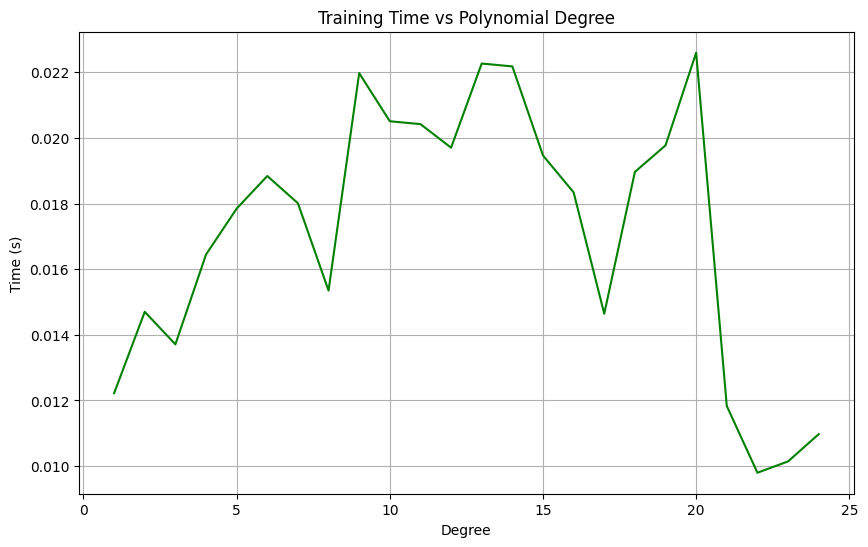

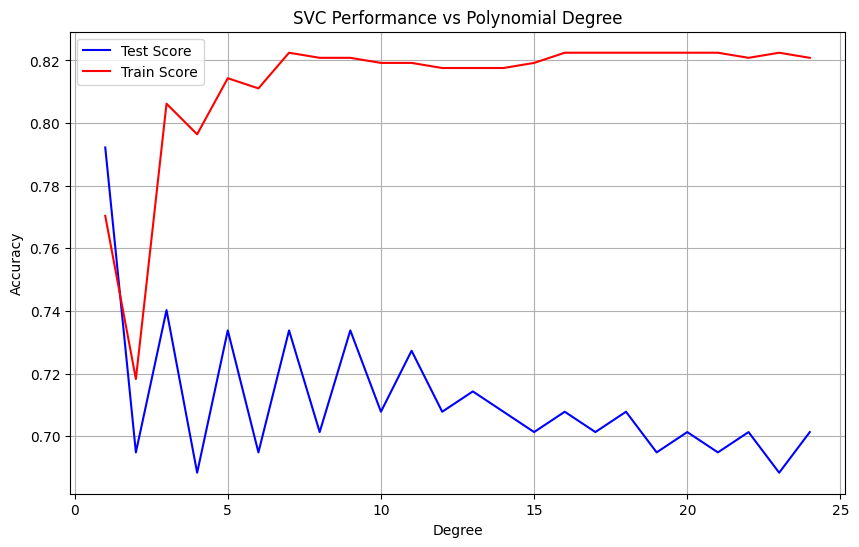

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 3d: Confusion Matrix and Class Imbalance (5 Points) (Extra Credit)

**Construct a function to create a Binary Classification Confusion Matrix.** Include a comment at the start of the cell with (YOUR NAME, SUBQUESTION). The function should take the form:
```py
def BinConfMatrix(y_pred, y_true):
	#...
	#some
```

Next, use the training code from the previous question to train the following model:
```py
model_svc = SVC(C=1, kernel='sigmoid', degree=2)
```

You should then use this model to predict the targets for the testing dataset and feed them alongside the true targets into the Confusion Matrix function. Make your code as readable as possible and include comments explaining how the code works. Finally, visualize the Confusion Matrix with the following function:
```py
def CMVis(cm):
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', pad=20)
    fig.colorbar(cax)
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, f'{z}', ha='center', va='center')
    plt.show()
```

You should interpret the results; How does the model perform in predicting each of the classes? Speculate as to why this is.

**NOTE: You need to make sure your cm matches the visualization function labels**

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

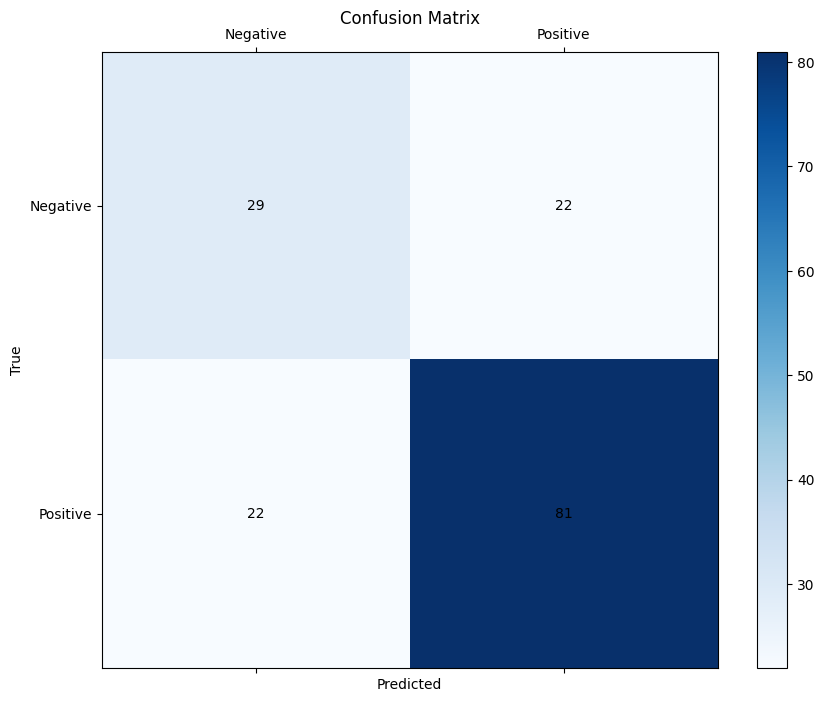

Positive Cases in Test Set: 51
Negative Cases in Test Set: 103


In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED